In [ ]:
class KNN:
    def __init__(self, K = 1, p = 2):
        self.K = K
        self.p = p

    # Подсчёт растояния у объекта (вектора) для 'p' расстояния
    def __distance(self, x,x_):
        dist = 0
        for i in range (len(x)):
            dist += (x[i] - x_[i]) ** self.p
        return dist ** (1/self.p)

    # Предсказание класса (Алгоритм решения задачи)
    def predict(self, data, y, obj):
        dist_arr = []
        labels = {-1: 0, 1: 0}
        for i in range(len(data)):
            dist_arr.append((self.__distance(data[i], obj), y[i])) # Кортеж: (Расстояние, метка класса)

        sorted_dist_arr = sorted(dist_arr, key=lambda x: x[0]) # Сортируем по первому элементу кортежа

        # Пробегаемся по 'k' ближайшим соседям
        for i in range(self.K):
            labels[sorted_dist_arr[i][1]] += 1 # Добавляем в словарь меток

        return max(labels, key=labels.get) # Выводит присвоенную метку класса (присвоение идёт голосованием, то есть наибольшее количество объктов класса в окрестности 'k' соседей)


In [ ]:
import pandas as pd

df = pd.read_csv('tea_or_coffee.csv', usecols = [x for x in range(1,11)])
df

,Кофе или чай?,Пол,Занимаетесь спортом?,Есть ли работа?,Есть ли сердечные заболевания?,Сова или Жаворонок,Есть ли молоко в холодильнике?,Время подъема,Административный округ,Время сна
0,Чай,М,Нет,Да,Нет,Жаворонок,Нет,6-7 утра,NaN,7-8 часов
1,Кофе,М,Да,Да,Нет,Сова,Да,5-6 утра,Юго-Восточный административный округ,7-8 часов
2,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
3,Чай,М,Нет,Нет,Нет,Сова,Нет,Позднее 8 утра,Южный административный округ,7-8 часов
4,Чай,Ж,Нет,Да,Нет,Сова,Да,Позднее 8 утра,Южный административный округ,Более 8 часов
5,Чай,М,Да,Да,Нет,Сова,Нет,7-8 утра,Южный административный округ,От 3 до 6 часов
6,Кофе,М,Да,Да,Да,Жаворонок,Нет,5-6 утра,Северо-западный административный округ,Менее 3 часов
7,Кофе,Ж,Нет,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
8,Чай,М,Нет,Нет,Нет,Сова,Да,Позднее 8 утра,Юго-Восточный административный округ,7-8 часов
9,Чай,М,Нет,Нет,Нет,Сова,Нет,7-8 утра,Северо-Восточный административный округ,7-8 часов


In [ ]:
df.rename(columns={'Кофе или чай?':'tea_or_coffee',
                   'Пол':'sex',
                   'Занимаетесь спортом?':'do_sport',
                   'Есть ли работа?':'employed',
                   'Есть ли сердечные заболевания?':'heart_diseases',
                   'Сова или Жаворонок':'owl_or_lark',
                   'Есть ли молоко в холодильнике?':'fridge',
                   'Время подъема':'wake_up_time',
                   'Административный округ':'district',
                   'Время сна':'asleep_time'}, inplace=True)



df['tea_or_coffee'] = df['tea_or_coffee'].replace({'Чай': -1, 'Кофе': 1})
df['sex'] = df['sex'].replace({'Ж': 0, 'М': 1})
df['do_sport'] = df['do_sport'].replace({'Нет': 0, 'Да': 1}).fillna(0)
df['employed'] = df['employed'].replace({'Нет': 0, 'Да': 1})
df['heart_diseases'] = df['heart_diseases'].replace({'Нет': 0, 'Да': 1})
df['owl_or_lark'] = df['owl_or_lark'].replace({'Жаворонок': 0, 'Сова': 1})
df['fridge'] = df['fridge'].replace({'Нет': 0, 'Да': 1})
df['wake_up_time'] = df['wake_up_time'].replace({'5-6 утра': 6, '6-7 утра': 7, '7-8 утра': 8, 'Позднее 8 утра': 10})
df["district"] = pd.Categorical(df["district"]).codes
df['asleep_time'] = df['asleep_time'].replace({'Менее 3 часов': 2, 'От 3 до 6 часов': 4, '7-8 часов': 8, 'Более 8 часов': 10})

df

,tea_or_coffee,sex,do_sport,employed,heart_diseases,owl_or_lark,fridge,wake_up_time,district,asleep_time
0,-1,1,0.0,1,0,0,0,7,-1,8
1,1,1,1.0,1,0,1,1,6,6,8
2,-1,1,1.0,0,0,1,0,10,0,8
3,-1,1,0.0,0,0,1,0,10,8,8
4,-1,0,0.0,1,0,1,1,10,8,10
5,-1,1,1.0,1,0,1,0,8,8,4
6,1,1,1.0,1,1,0,0,6,4,2
7,1,0,0.0,0,0,1,0,10,0,8
8,-1,1,0.0,0,0,1,1,10,6,8
9,-1,1,0.0,0,0,1,0,8,3,8


In [ ]:
from sklearn.datasets import make_blobs, make_circles, make_classification

from matplotlib import pyplot
from sklearn.metrics import accuracy_score

X = df.values[:, 1:]
y = df.values[:, 0]

# Протестим алгоритм, отрежем от датасета 20 объектов
X_train, y_train, X_test, y_test = X[:31], y[:31], X[31:], y[31:]

#test_el  = [1,3] # Сюда вбивать тестовые координаты

KNNClassifier = KNN(K = 6, p = 2)


print(f'data: {X_train[:10]}')
print(f'labels: {y_train[:10]}')
#print(f'Объект с координатами [{test_el[0]}, {test_el[1]}] имеет класс  "{KNNClassifier.predict(X, y, test_el)}"')



# Делаем предсказание для отрезанных элементов
y_pred = []


for obj in X_test:
    y_pred.append(KNNClassifier.predict(X_train, y_train, obj))

# Сравниваем предсказанные значения и метки класса
print(f'Предсказанные значения: {y_pred}')
print(f'Точность алгоритма = {accuracy_score(y_test, y_pred) * 100}%')

data: [[ 1.  0.  1.  0.  0.  0.  7. -1.  8.]
 [ 1.  1.  1.  0.  1.  1.  6.  6.  8.]
 [ 1.  1.  0.  0.  1.  0. 10.  0.  8.]
 [ 1.  0.  0.  0.  1.  0. 10.  8.  8.]
 [ 0.  0.  1.  0.  1.  1. 10.  8. 10.]
 [ 1.  1.  1.  0.  1.  0.  8.  8.  4.]
 [ 1.  1.  1.  1.  0.  0.  6.  4.  2.]
 [ 0.  0.  0.  0.  1.  0. 10.  0.  8.]
 [ 1.  0.  0.  0.  1.  1. 10.  6.  8.]
 [ 1.  0.  0.  0.  1.  0.  8.  3.  8.]]
labels: [-1.  1. -1. -1. -1. -1.  1.  1. -1. -1.]
Предсказанные значения: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Точность алгоритма = 80.0%


## Визуализация

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
#df['pca-three'] = pca_result[:,2]
print('principal component: {}'.format(pca.explained_variance_ratio_))

principal component: [0.54646381 0.25038831]


<ipython-input-69-b6714033108a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

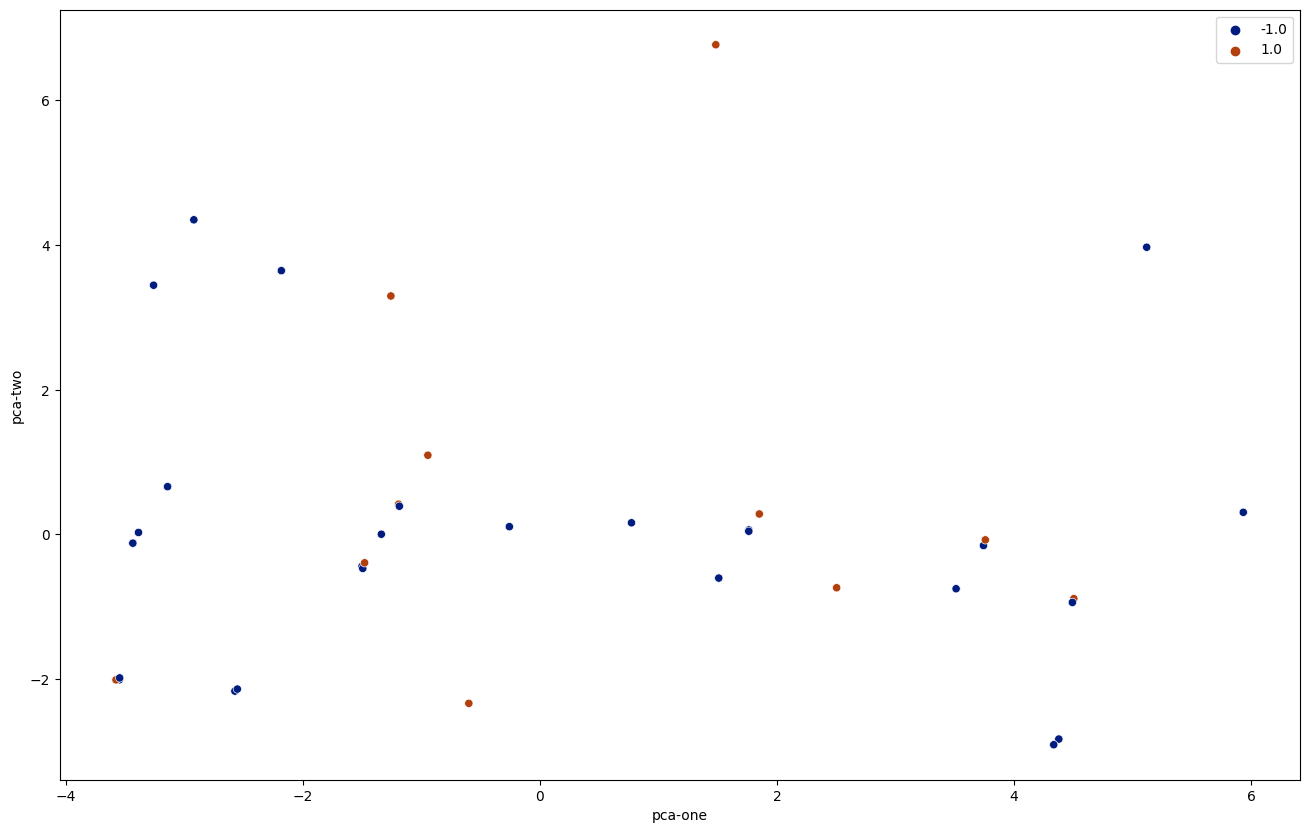

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(16,10))

# np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = y,
    palette=sns.color_palette("dark"),
    data=df,
    legend="full",
    #alpha=0.3
)

## Sklearn implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.values[:, 1:]
y = df.values[:, 0]

# Протестим алгоритм, отрежем от датасета 20 объектов
X_train, y_train, X_test, y_test = X[:31], y[:31], X[31:], y[31:]

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

# Делаем предсказание для отрезанных элементов
y_pred = neigh.predict(X_test)

# Сравниваем предсказанные значения и метки класса
print(f'Предсказанные значения: {y_pred}')
print(f'Точность алгоритма = {accuracy_score(y_test, y_pred) * 100}%')

Предсказанные значения: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Точность алгоритма = 80.0%


## Вывод

Алгоритм реализован верно, точность алгоритма сходится с точностью алгоритма из библеотеки sklearn. Из-за наивности алгоритма большей точности добиться тяжело.

*Попробуем более сложные метрические алгоритмы*

## Нормализация данных

In [ ]:
from sklearn import preprocessing
X = df.values[:, 1:]
y = df.values[:, 0]

d = preprocessing.MinMaxScaler().fit_transform(X)

scaled_df = pd.DataFrame(d, columns=columns[1:])
scaled_df

,sex,do_sport,employed,heart_diseases,owl_or_lark,fridge,wake_up_time,district,asleep_time
0,1.0,0.0,1.0,0.0,0.0,0.0,0.25,0.000000,0.75
1,1.0,1.0,1.0,0.0,1.0,1.0,0.00,0.777778,0.75
2,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.111111,0.75
3,1.0,0.0,0.0,0.0,1.0,0.0,1.00,1.000000,0.75
4,0.0,0.0,1.0,0.0,1.0,1.0,1.00,1.000000,1.00
5,1.0,1.0,1.0,0.0,1.0,0.0,0.50,1.000000,0.25
6,1.0,1.0,1.0,1.0,0.0,0.0,0.00,0.555556,0.00
7,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.111111,0.75
8,1.0,0.0,0.0,0.0,1.0,1.0,1.00,0.777778,0.75
9,1.0,0.0,0.0,0.0,1.0,0.0,0.50,0.444444,0.75


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = scaled_df.values
y = df.values[:, 0]

# Протестим алгоритм, отрежем от датасета 20 объектов
X_train, y_train, X_test, y_test = X[:31], y[:31], X[31:], y[31:]

Radius_neigh = RadiusNeighborsClassifier(radius=2)
Radius_neigh.fit(X_train, y_train)

# Делаем предсказание для отрезанных элементов
y_pred = Radius_neigh.predict(X_test)

# Сравниваем предсказанные значения и метки класса
print(f'Предсказанные значения: {y_pred}')
print(f'Точность алгоритма = {accuracy_score(y_test, y_pred) * 100}%')

Предсказанные значения: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Точность алгоритма = 80.0%


## Что-то ничего не поменялось :)